In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('turkiye-student-evaluation_generic.csv')

In [9]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
data['instr'].value_counts()

3    3601
2    1444
1     775
Name: instr, dtype: int64

In [13]:
samples=data.values

In [14]:
from sklearn.cluster import KMeans

ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

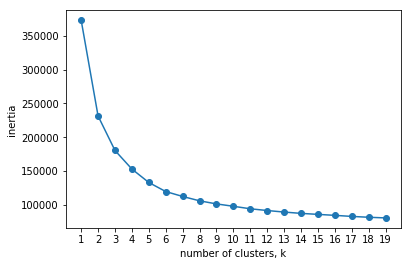

In [15]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
inertias

[373025.67285223363,
 231353.7586857733,
 180375.76659547855,
 152888.20644079396,
 133015.72314681506,
 119620.31935091235,
 112340.83695662013,
 105894.51500925327,
 101318.15633832906,
 97815.31205423849,
 94111.68160418593,
 91535.72262629162,
 89259.39625644263,
 87316.65616105364,
 85837.62862073451,
 84382.73468510536,
 82825.15405484475,
 81565.77048080745,
 80595.71915921068]

###  Creating the model

In [17]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=3)

In [42]:
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
labels = model.predict(samples)

In [44]:
labels

array([1, 1, 0, ..., 0, 2, 2])

### PCA

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(samples)
X_std

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

In [29]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca=sklearnPCA(n_components=2)
Y_sklearn=sklearn_pca.fit_transform(X_std)

In [31]:
df=pd.DataFrame(Y_sklearn,columns=['x','y'])

In [32]:
df

,x,y
0,0.742313,-0.109720
1,0.727500,-0.147146
2,-7.586498,0.364230
3,0.727500,-0.147146
4,9.054785,-1.113471
5,-3.465004,0.507352
6,-3.408806,-0.327695
7,-7.545112,-0.508243
8,-3.550615,-0.365196
9,-3.506390,1.379825


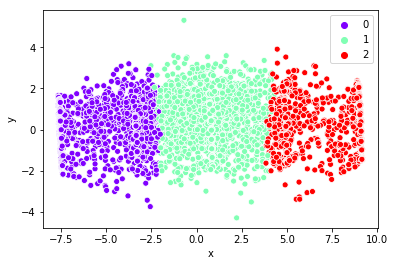

In [47]:
sns.scatterplot(df['x'],df['y'],hue=labels,palette='rainbow')